# Тестовое задание

### Импорт необходимых библиотек

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import classification_report
import random
import matplotlib.pyplot as plt

In [2]:
seed = 42
np.random.seed(seed)
random.seed(seed)

### Загрузка данных

In [3]:
data_raw = pd.read_excel('auto_complectations.xlsx')
data_raw

,brand,model,complect,type_car,seats,doors,Двигатель,Мощность,Крутящий момент двигателя,Коробка передач,...,Разгон до сотни,Максимальная скорость,Расход топлива (л/100 км)\nгород / трасса / смешанный,Дорожный просвет,Габариты (длина × ширина × высота),Колёсная база,Объём багажника,Объём багажника максимальный,Объём топливного бака,Масса автомобиля
0,Audi,A3 Sedan,1.4 TFSI 7AMT,Седан класса C,5,4,бензиновый (1395 см³),150 л. с.,250 Н·м,роботизированная (7 ступеней),...,8.2 секунды,224 км/ч,5.9 / 4.1 / 4.8,165 мм,4458 × 1796 × 1416,2637 мм,425 л,880 л,50 л,1320 кг
1,Audi,A3 Sedan,sport 1.4 TFSI 7AMT,Седан класса C,5,4,бензиновый (1395 см³),150 л. с.,250 Н·м,роботизированная (7 ступеней),...,8.2 секунды,224 км/ч,5.9 / 4.1 / 4.8,165 мм,4458 × 1796 × 1416,2637 мм,425 л,880 л,50 л,1320 кг
2,Audi,A3 Sedan,2.0 TFSI 7AMT,Седан класса C,5,4,бензиновый (1984 см³),190 л. с.,320 Н·м,роботизированная (7 ступеней),...,6.8 секунды,250 км/ч,7.2 / 4.7 / 5.6,165 мм,4458 × 1796 × 1416,2637 мм,425 л,880 л,50 л,1395 кг
3,Audi,A3 Sedan,2.0 TFSI 7AMT quattro,Седан класса C,5,4,бензиновый (1984 см³),190 л. с.,320 Н·м,роботизированная (7 ступеней),...,6.2 секунды,242 км/ч,7.2 / 4.8 / 5.7,165 мм,4458 × 1796 × 1416,2637 мм,390 л,845 л,55 л,1465 кг
4,Audi,A3 Sedan,sport 2.0 TFSI 7AMT,Седан класса C,5,4,бензиновый (1984 см³),190 л. с.,320 Н·м,роботизированная (7 ступеней),...,6.8 секунды,242 км/ч,7.2 / 4.7 / 5.6,165 мм,4458 × 1796 × 1416,2637 мм,425 л,880 л,50 л,1395 кг
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1698,Volvo,XC90,D5 AT 5S R-Design,Большой кроссовер,5,5,дизельный (1969 см³),235 л. с.,480 Н·м,автоматическая (8 ступеней),...,7.8 секунды,220 км/ч,6.4 / 5.5 / 5.8,237 мм,4950 × 2008 × 1776,2984 мм,721 л,1899 л,71 л,1969 кг
1699,Volvo,XC90,T6 AT 7S R-Design,Большой кроссовер,7,5,бензиновый (1969 см³),320 л. с.,400 Н·м,автоматическая (8 ступеней),...,6.5 секунды,230 км/ч,0 / 0 / 8.3,237 мм,4950 × 2008 × 1776,2984 мм,692 л,1899 л,71 л,2004 кг
1700,Volvo,XC90,D5 AT 7S R-Design,Большой кроссовер,7,5,дизельный (1969 см³),235 л. с.,480 Н·м,автоматическая (8 ступеней),...,7.8 секунды,220 км/ч,6.4 / 5.5 / 5.8,237 мм,4950 × 2008 × 1776,2984 мм,692 л,1899 л,71 л,2009 кг
1701,Volvo,XC90,T8 AT 7S Inscription,Большой кроссовер,7,5,гибридный (1969 см³),407 л. с.,640 Н·м,автоматическая (8 ступеней),...,5.6 секунды,230 км/ч,0 / 0 / 2.1,237 мм,4950 × 2008 × 1776,2984 мм,640 л,1899 л,70 л,2350 кг


Данные представлены в произвольном виде, формат большиства столбцов не сооветствует int/float значениям и требует переформатирования

### Анализ и преобработка данных

Проверим наличие NaN-значений

In [4]:
data_raw.isnull().sum().sum()

0

Поскольку формат данных произвольный, отсутствующие значения могут быть представлены в другом виде

Так как значения каждой из колонок не слишком вариативны (есть повторяющиеся значения, особенно в случаях для количество сидячих мест, дверей), рационально посмотреть на возможные значения с целью проверки данных на наличие ошибок и беглого визуального анализа значений

In [5]:
data_raw.columns

Index(['brand', 'model', 'complect', 'type_car', 'seats', 'doors', 'Двигатель',
       'Мощность', 'Крутящий момент двигателя', 'Коробка передач', 'Привод',
       'Разгон до сотни', 'Максимальная скорость',
       'Расход топлива (л/100 км)\nгород / трасса / смешанный',
       'Дорожный просвет', 'Габариты (длина × ширина × высота)',
       'Колёсная база', 'Объём багажника', 'Объём багажника максимальный',
       'Объём топливного бака', 'Масса автомобиля'],
      dtype='object')

In [6]:
data_raw['seats'].unique()

array([5, 4, 7, 2, 6, 8, 1, 9], dtype=int64)

Метод unique(), соответственно, можно выполнить для всех колонок. Для удобства чтения оставлен только пример

In [7]:
data = pd.DataFrame()
data['Количество сидячих мест'] = data_raw['seats']
data['Количество дверей'] = data_raw['doors']
data['Двигатель'] = [int(i[i.find('(')+1:i.rfind(' ')]) for i in data_raw['Двигатель']]
data['Мощность'] = [int(i[:-6]) for i in data_raw['Мощность']]
data['Крутящий момент двигателя'] = [int(i[:-3]) for i in data_raw['Крутящий момент двигателя']]
#data['Разгон до сотни'] = [i[:-7] for i in data_raw['Разгон до сотни']]
data['Максимальная скорость'] = [int(i[:-4]) for i in data_raw['Максимальная скорость']]
data['Дорожный просвет'] = [int(i[:-3]) for i in data_raw['Дорожный просвет']]
data['Колёсная база'] = [int(i[:-3]) for i in data_raw['Колёсная база']]
data['Объём багажника'] = [int(i[:-2]) for i in data_raw['Объём багажника']]
data['Объём багажника максимальный'] = [int(i[:-2]) for i in data_raw['Объём багажника максимальный']]
data['Объём топливного бака'] = [int(i[:-2]) for i in data_raw['Объём топливного бака']]
data['Масса автомобиля'] = [int(i[:-3]) for i in data_raw['Масса автомобиля']]
data['Длина'] = [int(i[:i.find('×')]) for i in data_raw['Габариты (длина × ширина × высота)']]
data['Ширина'] = [int(i[i.find('×')+1 : i.rfind('×')-1]) for i in data_raw['Габариты (длина × ширина × высота)']]
data['Высота'] = [int(i[i.rfind('×')+1:]) for i in data_raw['Габариты (длина × ширина × высота)']]
data['Привод'] = data_raw['Привод']
data['type_car'] = [str(i).lower() for i in data_raw['type_car']]

In [8]:
data

,Количество сидячих мест,Количество дверей,Двигатель,Мощность,Крутящий момент двигателя,Максимальная скорость,Дорожный просвет,Колёсная база,Объём багажника,Объём багажника максимальный,Объём топливного бака,Масса автомобиля,Длина,Ширина,Высота,Привод,type_car
0,5,4,1395,150,250,224,165,2637,425,880,50,1320,4458,1796,1416,передний,седан класса c
1,5,4,1395,150,250,224,165,2637,425,880,50,1320,4458,1796,1416,передний,седан класса c
2,5,4,1984,190,320,250,165,2637,425,880,50,1395,4458,1796,1416,передний,седан класса c
3,5,4,1984,190,320,242,165,2637,390,845,55,1465,4458,1796,1416,полный,седан класса c
4,5,4,1984,190,320,242,165,2637,425,880,50,1395,4458,1796,1416,передний,седан класса c
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1698,5,5,1969,235,480,220,237,2984,721,1899,71,1969,4950,2008,1776,полный,большой кроссовер
1699,7,5,1969,320,400,230,237,2984,692,1899,71,2004,4950,2008,1776,полный,большой кроссовер
1700,7,5,1969,235,480,220,237,2984,692,1899,71,2009,4950,2008,1776,полный,большой кроссовер
1701,7,5,1969,407,640,230,237,2984,640,1899,70,2350,4950,2008,1776,полный,большой кроссовер


Поскольку в задании указано разделение на 4 класса (Седан - Хетчбек - Кроссовер - Внедорожник), не ясно куда относить универсал, купе и прочие кузовы. Если подразумевалось отнесение универсала к седану или хэтчбеку, то не совсем ясно, к чему из двух,  и это не было эксплицитно указано. Я решил оставить только классы, непосредственно содержащие одно из 4 (Седан - Хетчбек - Кроссовер - Внедорожник)

In [9]:
data = data[data["type_car"].str.contains("универсал")==False]
data = data[data["type_car"].str.contains("купе")==False]
data = data[data["type_car"].str.contains("родстер")==False]
data = data[data["type_car"].str.contains("вэн")==False]
data = data[data["type_car"].str.contains("пикап")==False]
data = data[data["type_car"].str.contains("кабриолет")==False]
data = data.reset_index()
data = data.drop('index', axis = 1)
data

,Количество сидячих мест,Количество дверей,Двигатель,Мощность,Крутящий момент двигателя,Максимальная скорость,Дорожный просвет,Колёсная база,Объём багажника,Объём багажника максимальный,Объём топливного бака,Масса автомобиля,Длина,Ширина,Высота,Привод,type_car
0,5,4,1395,150,250,224,165,2637,425,880,50,1320,4458,1796,1416,передний,седан класса c
1,5,4,1395,150,250,224,165,2637,425,880,50,1320,4458,1796,1416,передний,седан класса c
2,5,4,1984,190,320,250,165,2637,425,880,50,1395,4458,1796,1416,передний,седан класса c
3,5,4,1984,190,320,242,165,2637,390,845,55,1465,4458,1796,1416,полный,седан класса c
4,5,4,1984,190,320,242,165,2637,425,880,50,1395,4458,1796,1416,передний,седан класса c
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,5,5,1969,235,480,220,237,2984,721,1899,71,1969,4950,2008,1776,полный,большой кроссовер
1468,7,5,1969,320,400,230,237,2984,692,1899,71,2004,4950,2008,1776,полный,большой кроссовер
1469,7,5,1969,235,480,220,237,2984,692,1899,71,2009,4950,2008,1776,полный,большой кроссовер
1470,7,5,1969,407,640,230,237,2984,640,1899,70,2350,4950,2008,1776,полный,большой кроссовер


Переводим тип кузова в численный вид (не успел нормальную функцию сделать, но что ж)

In [10]:
tc = data['type_car']
tcl = []
for i in range(len(tc)):
    if "седан" in tc[i]:
        tcl.append(1)
    elif "хэтчбек" in tc[i]:
        tcl.append(2)
    elif "кроссовер" in tc[i]:
        tcl.append(3)
    else:
        tcl.append(4)

In [11]:
data.type_car = tcl

Тоже самое с приводом

In [12]:
pr = data['Привод']
prd = []
for i in range(len(pr)):
    if pr[i] == 'полный':
        prd.append(1)
    elif pr[i] == 'задний':
        prd.append(2)
    else:
        prd.append(3)

In [13]:
data['Привод'] = prd

In [14]:
data

,Количество сидячих мест,Количество дверей,Двигатель,Мощность,Крутящий момент двигателя,Максимальная скорость,Дорожный просвет,Колёсная база,Объём багажника,Объём багажника максимальный,Объём топливного бака,Масса автомобиля,Длина,Ширина,Высота,Привод,type_car
0,5,4,1395,150,250,224,165,2637,425,880,50,1320,4458,1796,1416,3,1
1,5,4,1395,150,250,224,165,2637,425,880,50,1320,4458,1796,1416,3,1
2,5,4,1984,190,320,250,165,2637,425,880,50,1395,4458,1796,1416,3,1
3,5,4,1984,190,320,242,165,2637,390,845,55,1465,4458,1796,1416,1,1
4,5,4,1984,190,320,242,165,2637,425,880,50,1395,4458,1796,1416,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,5,5,1969,235,480,220,237,2984,721,1899,71,1969,4950,2008,1776,1,3
1468,7,5,1969,320,400,230,237,2984,692,1899,71,2004,4950,2008,1776,1,3
1469,7,5,1969,235,480,220,237,2984,692,1899,71,2009,4950,2008,1776,1,3
1470,7,5,1969,407,640,230,237,2984,640,1899,70,2350,4950,2008,1776,1,3


Разбиваем данные на обучающие и тестовые

In [15]:
train, test = train_test_split(data)

Классификация деревом решений должна идеально подходить поставленной задаче, поскольку даже на глаз можно прочертить границу между двумя типами кузовов из представленных в данных параметров (особенно размер кузова, объем бака, объем багажника) 

In [16]:
dtc = DTC()

In [17]:
dtc.fit(train.iloc[:, :-5], train.loc[:, 'type_car'])

DecisionTreeClassifier()

In [18]:
preds = pd.DataFrame(dtc.predict(test.iloc[:, :-5]))

Добавление фич длина, высота, ширина и привод ухудшают результаты

In [19]:
real = pd.DataFrame(test.loc[:, 'type_car']).reset_index().drop('index', axis=1)

In [20]:
dtc.feature_importances_

array([0.03711424, 0.41359078, 0.01200527, 0.        , 0.        ,
       0.04132526, 0.1444197 , 0.02116027, 0.01508137, 0.01529634,
       0.214248  , 0.08575877])

### Визуализация дерева решений

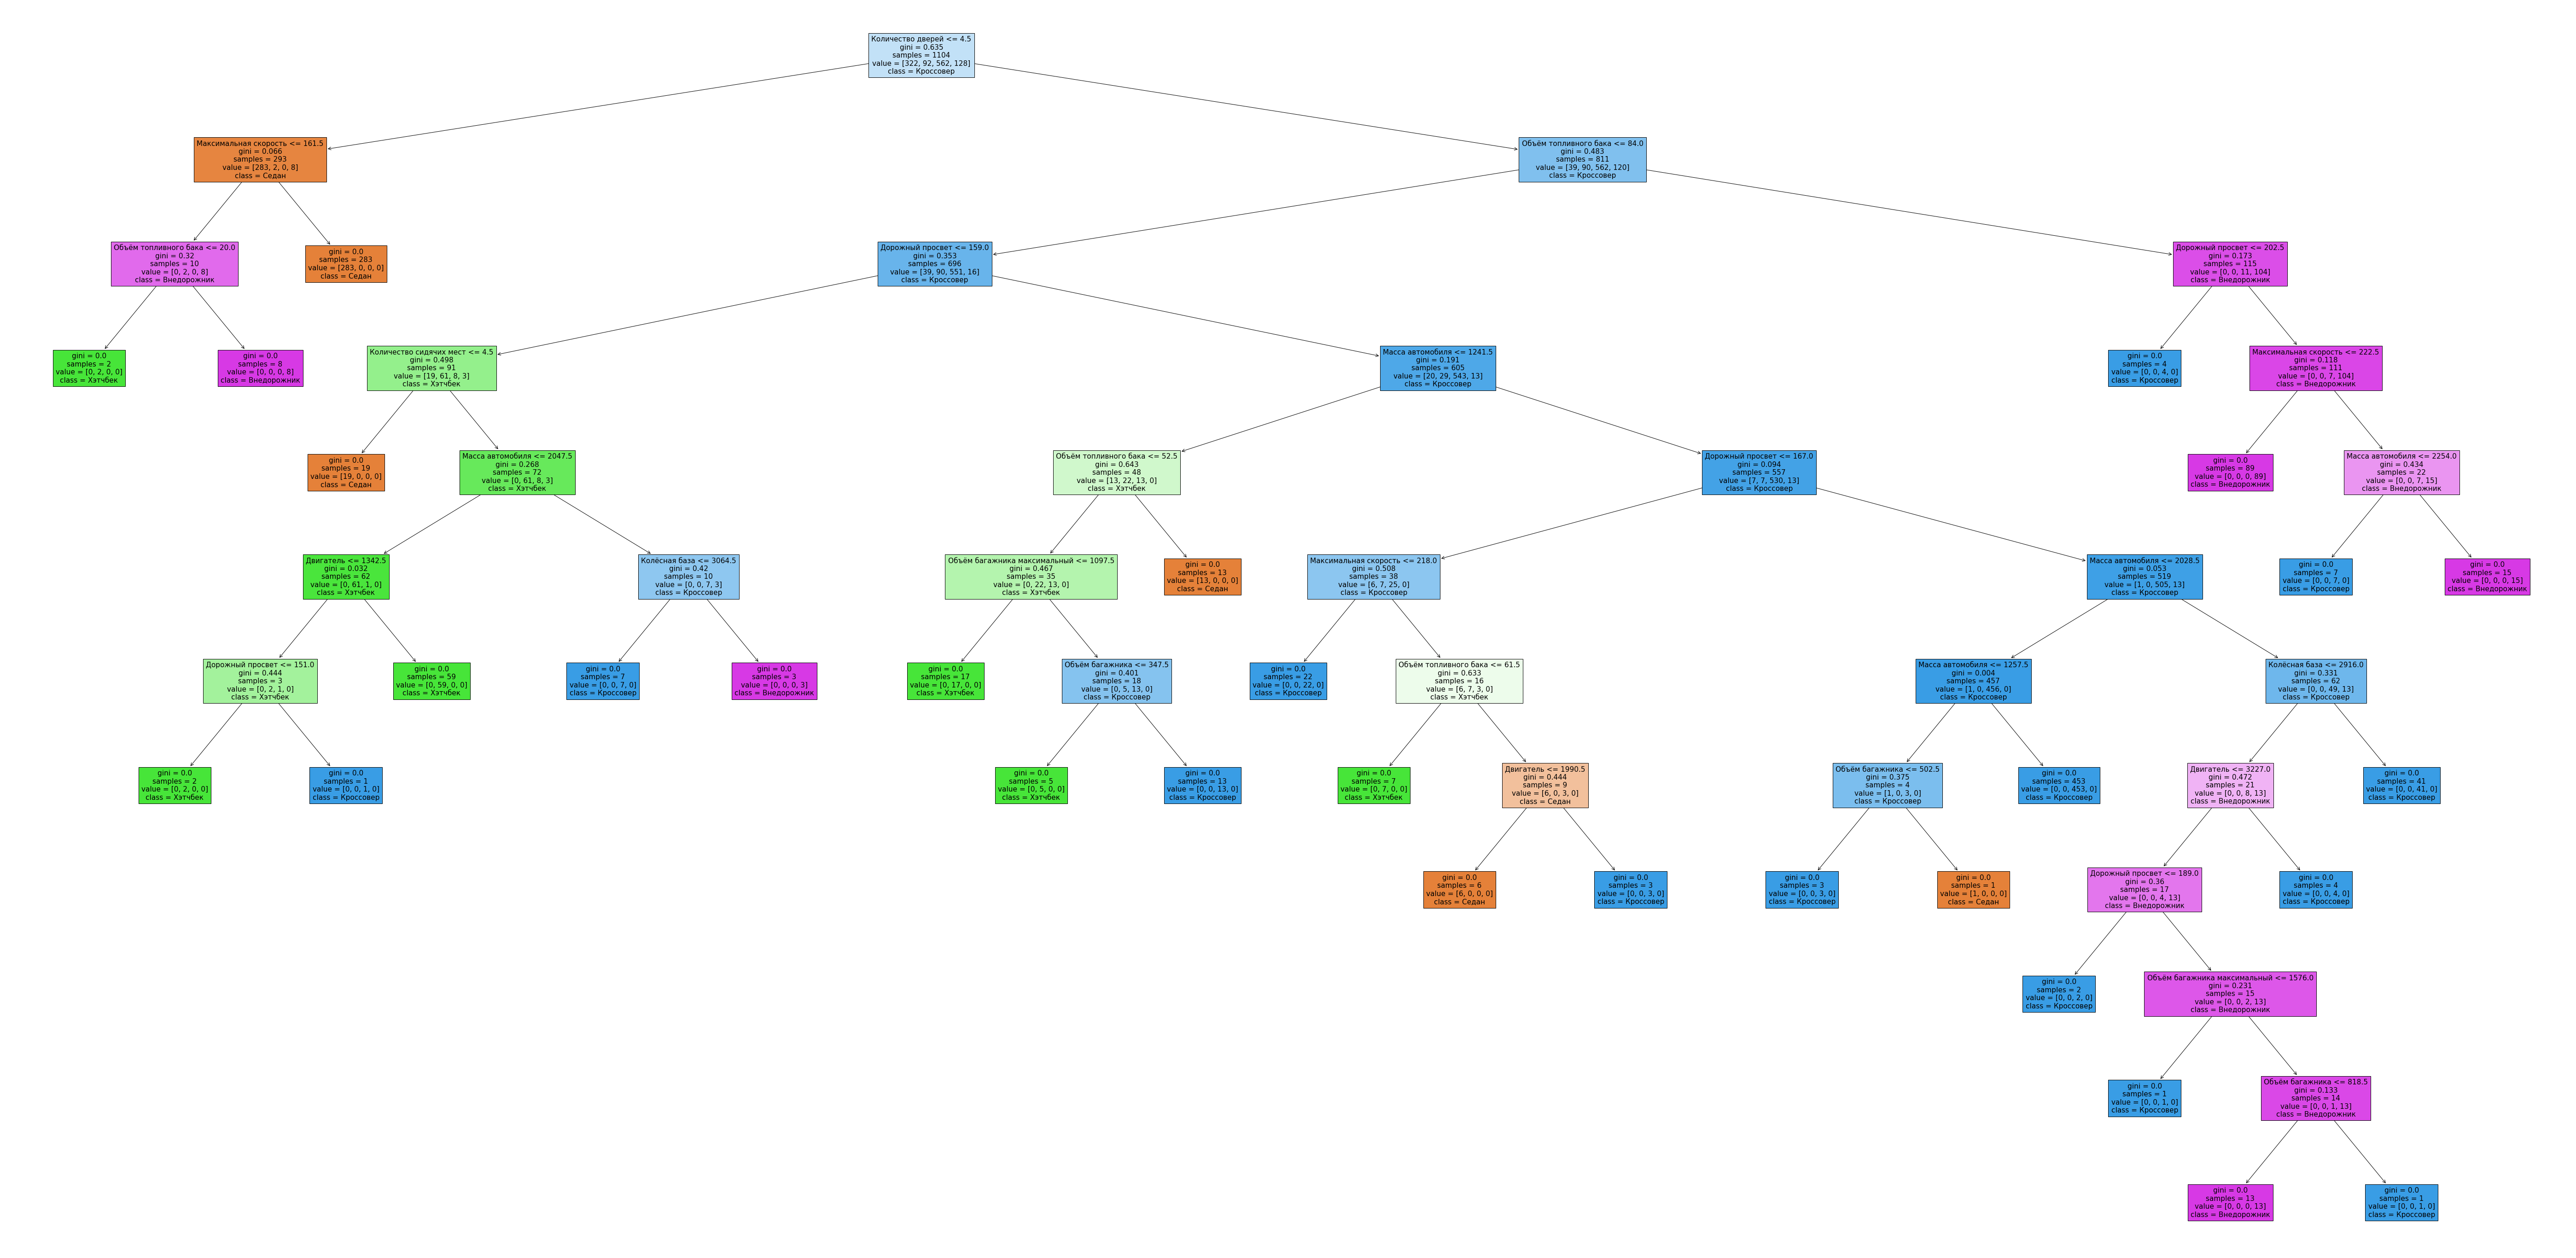

In [21]:
fig = plt.figure(figsize=(100,50))
pl = tree.plot_tree(dtc,
                   feature_names=data.columns,
                   class_names = ['Седан', 'Хэтчбек', 'Кроссовер', 'Внедорожник'],
                   filled=True)

### Метрики

In [22]:
report = classification_report(real, preds, target_names=['Седан', 'Хэтчбек', 'Кроссовер', 'Внедорожник'])
print(report)

              precision    recall  f1-score   support

       Седан       1.00      1.00      1.00        94
     Хэтчбек       0.97      1.00      0.99        36
   Кроссовер       0.98      0.99      0.99       192
 Внедорожник       1.00      0.93      0.97        46

    accuracy                           0.99       368
   macro avg       0.99      0.98      0.99       368
weighted avg       0.99      0.99      0.99       368



Получился достаточно высокий F-score. Можно пытаться увеличивать, меняя фичи и параметры дерева